In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('DM2425_ABCDEats_DATASET.csv',delimiter=',')

#Drop Dublicates

In [3]:
df.duplicated().sum()

13

In [4]:
df=df.drop_duplicates()
# Count the number of remaining duplicate rows in the DataFrame after dropping duplicates
df.duplicated().sum()

0

# Set costumer_id as the index

In [5]:
df.set_index('customer_id', inplace=True)

## Fixing variables

**costumer_age**

Fill missing values with median

In [6]:
df['customer_age'].isna().sum()

727

In [7]:
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)
df['customer_age'].isna().sum()

<ipython-input-7-3ad8a2b86644>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_age'].fillna(df['customer_age'].median(),inplace=True)


0

**costumer_region**

In [8]:
df['customer_region'] = df['customer_region'].replace('-', 'Unknown')

**product_count**

In [9]:
df.loc['92ced2dcb9','product_count']=100

**first_order**

In [10]:
df['first_order'].fillna(df['first_order'].median(),inplace=True)

<ipython-input-10-542326bf2f64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_order'].fillna(df['first_order'].median(),inplace=True)


**last_promo**

In [11]:
df['last_promo'] = df['last_promo'].replace('-', 'no_promotion_used')

**HR_0**

In [12]:
df.drop(columns=['HR_0'], inplace=True)

#Fixing inconsistencies

Eliminate rows where there are inconsistencies

In [13]:
df['sum_HR']=df['HR_1']+df['HR_2']+df['HR_3']+df['HR_4']+df['HR_5']+df['HR_6']+df['HR_7']+df['HR_8']+df['HR_9']+df['HR_10']+df['HR_11']+df['HR_12']+df['HR_13']+df['HR_14']+df['HR_15']+df['HR_16']+df['HR_17']+df['HR_18']+df['HR_19']+df['HR_20']+df['HR_21']+df['HR_22']+df['HR_23']
df['sum_DOW']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']
df['inc_0']=(df['sum_HR']!=df['sum_DOW'])
df['inc_2']=(df['product_count']==0)
df = df.loc[~(df['inc_0'] | df['inc_2'])]
df.drop(columns=['sum_HR', 'sum_DOW', 'inc_0', 'inc_2'], inplace=True)

<ipython-input-13-460a7041edd9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['sum_HR', 'sum_DOW', 'inc_0', 'inc_2'], inplace=True)


# New variables

**Total_Spent**

In [14]:
cuisine = [col for col in df.columns if col.startswith('CUI_')]

In [15]:
df['Total_Spent']=df[cuisine].sum(axis=1)

<ipython-input-15-e0b8285253ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spent']=df[cuisine].sum(axis=1)


Deal with extreme outliers

In [16]:
df = df.drop('92ced2dcb9', axis=0)
df.loc['249ba584d3','CUI_Asian']=500
df.loc['8d65421423','CUI_Japanese']=590
df['Total_Spent']=df[cuisine].sum(axis=1)

**Order_Count**

In [17]:
df['order_count']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']

**Diversity_Cuisine**

In [18]:
df['Diversity_Cuisine'] = (df[cuisine] > 0).sum(axis=1)
df['Diversity_Cuisine'] = df['order_count']/df['Diversity_Cuisine']

**Costumer_time**

In [19]:
df['costumer_time']=df['last_order']-df['first_order']

**Intensity_of_Activity**

In [20]:
df['Intensity_of_Activity'] = df['costumer_time'] / df['order_count']

**Customer_Loyalty**

In [21]:
df['Customer_loyalty'] = df['vendor_count'] / df['order_count']

**Product_Intensity**

In [22]:
df['product_intensity'] = df['product_count'] / df['order_count']

**Day_Week_Spread**

In [23]:
days = [col for col in df.columns if col.startswith('DOW_')]

In [24]:
df['Day_Week_Spread'] = df.loc[:,days].var(axis=1)

**Day_week_highest**

In [25]:
df['week_highest']=df.loc[:,days].idxmax(axis=1)
df['week_highest']=df['week_highest'].str.replace('DOW_', '')
df['week_highest']=df['week_highest'].astype(int)
df['week_highest']=df['week_highest']+1

**hour_spread**

In [26]:
hours=[col for col in df.columns if col.startswith('HR_')]

In [27]:
df['hour_spread'] = df.loc[:,hours].var(axis=1)

**hour_highest**

In [28]:
df['hour_highest']=df.loc[:,hours].idxmax(axis=1)
df['hour_highest']=df['hour_highest'].str.replace('HR_', '')
df['hour_highest']=df['hour_highest'].astype(int)

# Normalize data

In [29]:
metric_features = df.select_dtypes(include=['number']).columns.tolist()

In [30]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df[metric_features])
df[metric_features] = scaled_feat

In [31]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [32]:
ohc = OneHotEncoder(sparse_output=False, drop="first")
ohc_feat = ohc.fit_transform(df[categorical_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
customer_id,,,,,,,,,,,,,
1b8f824d5e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5d272b9dcb,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
f6d1b2ba63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180c632ed8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4eb37a6705,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
f6b6709018,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
f74ad8ce3f,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#PCA for CUIS`s

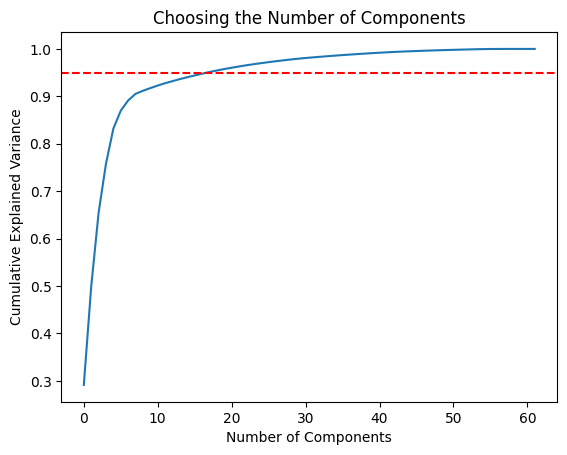

In [41]:
X = df[metric_features]
pca = PCA().fit(X)
# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--')  # For 95% explained variance
plt.show()
eigenvalues = pca.explained_variance_
n_components = np.sum(eigenvalues > 1)

In [46]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,1.606676e-01,0.000000e+00,2.913753e-01,0.291375
2,1.144447e-01,-4.622282e-02,2.075489e-01,0.498924
3,8.578907e-02,-2.865567e-02,1.555810e-01,0.654505
4,5.718179e-02,-2.860728e-02,1.037008e-01,0.758206
5,4.080141e-02,-1.638038e-02,7.399455e-02,0.832201
...,...,...,...,...
58,3.773896e-05,-7.905953e-06,6.844070e-05,1.000000
59,3.884130e-18,-3.773896e-05,7.043984e-18,1.000000
60,0.000000e+00,-3.884130e-18,0.000000e+00,1.000000
61,0.000000e+00,0.000000e+00,0.000000e+00,1.000000


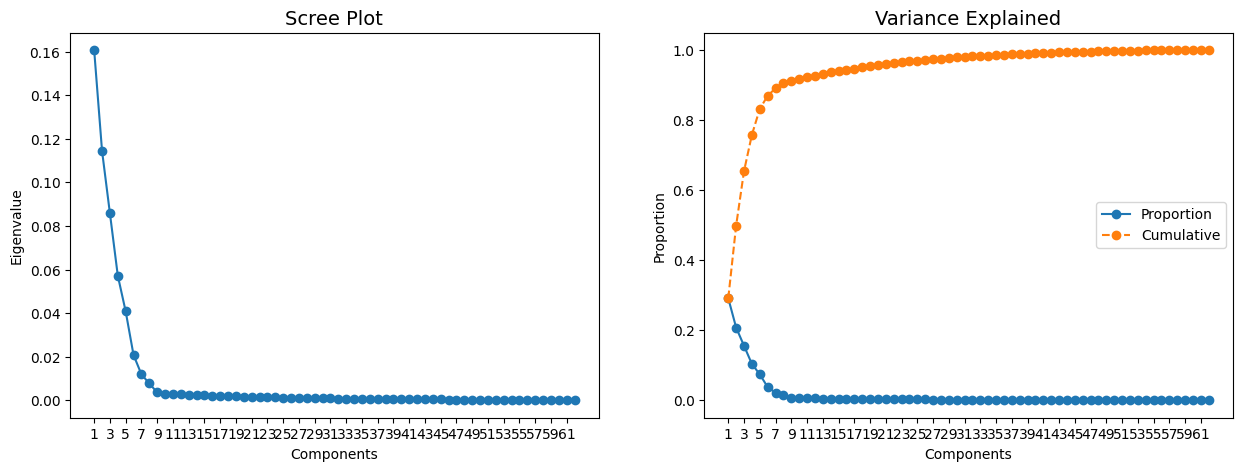

In [44]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

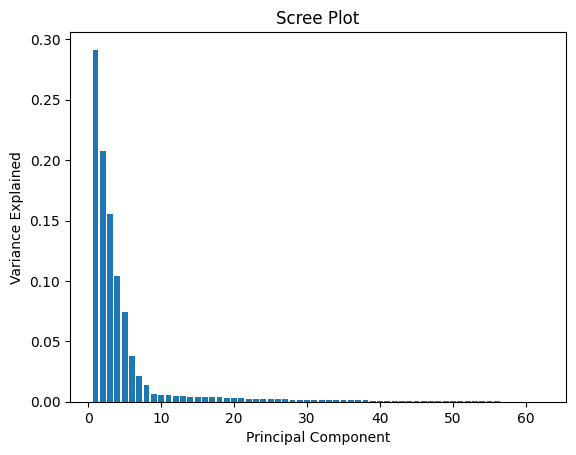

In [42]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

In [43]:
print(f"Number of components with eigenvalues > 1: {n_components}")

Number of components with eigenvalues > 1: 0


In [ ]:
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
df = pd.DataFrame(pca_feat, index=df.index, columns=pca_feat_names)  # remember index=df_pca.index
df